         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0
label
1    500
0    500
Name: count, dtype: int64


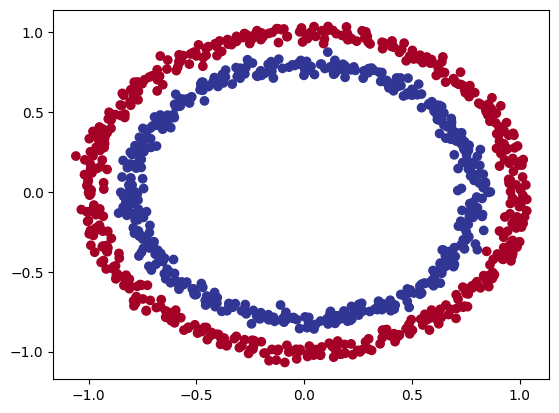

In [15]:
#9일차 코드
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
print(circles.head(10))
print(circles.label.value_counts())

import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

In [16]:
print(X.shape)
print(y.shape)

# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")
# two inputs for one output

(1000, 2)
(1000,)
Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
# Turn data into tensors and create train and test splits
# 1. Turn the data into tensors (지금은 데이터가 Numpy arrays로 되어있고, Pytorch prefers to work with PyTorch tensors)
# 2. Split data into training and test sets
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
print(X[:5])
print(y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])
tensor([1., 1., 1., 1., 0.])


In [19]:
# train_test_split()  (from Scikit-Learn)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# test_size = 0.2 -> 20% test, 80% train
# random_state = 42 -> make the random split reproducible
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [20]:
# Building a model
# 1. setting up device agnostic code
# 2. constructing a model by subclassing nn.Module
# 3. Defining a loss function and optimizer
# 4. Creating a training loop

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
# supervised learning(지도 학습) : feature(특징)과 label(라벨)이 함께 있는 구조 (특정 입력이 주어졌을 때 어떤 출력이 나와야 하는지를 데이터가 모델에 알려줌)

# create a model class
# 1. Subclasses nn.Module
# 2. Creates 2 nn.Linear layers in the constructor(생성자, __init__) capable of handling the input and ouput shapes of X and y
    # (생성자 안에서, X와 y의 입력과 출력 shape을 처리할 수 있는 두 개의 nn.Linear 계층을 생성)
# 3. Defines a forward() method containing the forward pass computation(순전파 연산) of the model
# 4. Instantiates the model class and sends it to the target device

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # this is known as having 5 hidden units or neurons
        self.layer_2 = nn.Linear(in_features=5, out_features=1) 
        # hidden units(neurons) allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs.
        # 신경망 계층에서 사용할 수 있는 은닉 유닛의 수는 hyperparameter(a value you can set yourself), and there's no set in stone(완전히 고정된 것) value you have to use

    def forward(self,x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x))  # 연산(computation)은 layer_1을 거치고 그 결과가 layer_2를 거침

model_0 = CircleModelV0().to(device)
print(model_0)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [27]:
# nn.Sequential : performs a forward pass computation of the input data through the layers in the order they appear
# Replicate CircleModelV0 with nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

print(model_0,"\n")

# nn.Sequential은 straight-forward computations에는 훌륭하지만, 이름 그대로 정해진 순서대로 실행됨(runs in sequential order)
# 단순히 순서대로 처리하는 것 이외에 다른 동작을 원한다면, 직접 nn.Module을 상속해서 커스텀 클래스를 정의하는 것이 필요함
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
) 

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.3754],
        [0.4166],
        [0.3101],
        [0.3938],
        [0.3776],
        [0.4022],
        [0.4645],
        [0.4613],
        [0.3074],
        [0.4201]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# Setup loss function and optimizer

different problem types require different loss functions 
(e.g.) regression problem(predicting a number) - mean absolute error (MAE) loss
(e.g.) binary classification problem - binary cross entropy
Same optimizer function can often be used across different problem spaces (같은 옵티마이저 함수는 가끔 서로 다른 문제 유형들에도 공통으로 사용될 수 있음)
(e.g.) torch.optim.SGD() can be used for a range of problems(다양한 문제에 사용될 수 있음), and the same applies to the torch.optim.Adam()

1. Stochastic Gradient Descent(SGD) optimizer : torch.optim.SGD() - Classification, regression, many others
2. Adam Optimizer : torch.optim.Adam() - Classification, regression, many others
3. Binary cross entropy loss : torch.nn.BCELossWithLogits or torch.nn.BCELoss(nn.Sigmoid층 유무의 차이) - Binary classification
4. Cross entropy loss : torch.nn.CrossEntropyLoss - Multi-class classification
5. Mean absolute error(MAE) or L1Loss : torch.nn.L1Loss - Regression
6. Mean squared error(MSE) or L2Loss : torch.nn.MSELoss - Regression

 (3)PyTorch has two Binary cross entropy implementations(구현)
  1. torch.nn.BCELoss() - target(label)과 input(features) 사이의 binary cross entropy(이진 크로스 엔트로피)를 계산함
  2. torch.nn.BCEWithLogitsLoss() - 위 함수와 동일한 기능을 하지만, 내부에 sigmoid layer(nn.Sigmoid)가 있음 (내장되어 있음, built-in)
   + torch.nn.BCEWithLogitsloss()이 nn.Sigmoid layer를 거친 다음 torch.nn.BCELoss()를 사용하는 것보다 수치적으로 더 안정적, 일반적으로는 BCEWithLogitsLoss()가 더 나은 선택
   + advanced usage에 있어서는, nn.Sigmoid와 torch.nn.BCELoss()를 따로 분리하여 사용하는 것이 필요할 수 있음

In [28]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()  # sigmoid built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [29]:
# evaluation metric (평가 지표)
# loss function이 모델이 얼마나 틀렸는지를 측정한다면, evaluation metrics는 모델이 얼마나 맞았는지를 측정한다고 생각하면 됨

# Accuracy(정확도) can be measured by dividing the total number of correct predictions over the total number of predictions  # 전체 예측 중 맞은 예측의 개수 / 전체 예측 수
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()  # torch.eq() calculates where two tensors are equal (두 텐서의 각 원소를 비교하여 값이 같으면 True, 다르면 False를 반환)
    acc = (correct/len(y_pred))*100
    return acc

In [ ]:
# Train model

# Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
y_logits = model_0(X_test.to(device))[:5]
print(y_logits)

tensor([[0.3754],
        [0.4166],
        [0.3101],
        [0.3938],
        [0.3776]], device='cuda:0', grad_fn=<SliceBackward0>)


모델이 아직 학습되지 않았기 때문에, 지금 출력되는 값들은 무작위에 가까움, 이 값들은 forward() 메서드의 output임
forward() 메서드는 내부적으로 두 개의 nn.Linear() layer를 포함하고 있으며, nn.Linear()는  y = x*Weights(transposed) + bias 의 수학식을 따름
the raw outputs(unmodified) of this equation(y) and in turn, the raw outputs of our model are often referred to as logits   # 이 식의 출력값(y), 수정되지 않은(raw) 결과값을 우리는 logits이라고 부름
raw outputs : 원시 출력값
위에서 모델이 x(X_test)를 입력으로 받아 출력한 값이 logits
하지만 이러한 숫자들은 해석하기가 어려움
We'd like some numbers that are comparable to our truth labels. To get the model's raw outputs (logits) into such a form, use the sigmoid activation function
(로짓을 실제 정답 레이블과 비교하기 쉬운 형태로 바꾸기 위해(해석 가능한 형태로 바꾸기 위해) 사용할 수 있는 것이 sigmoid activation function임)

In [34]:
y_pred_probs = torch.sigmoid(y_logits)  # prediction probabilities : the values are now how much the model thinks the data point belongs to one class or another
print(y_pred_probs)

tensor([[0.5928],
        [0.6027],
        [0.5769],
        [0.5972],
        [0.5933]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [ ]:
# decision boundary(결정 경계) : 머신러닝 분류 모델이 클래스들을 구분하는 기준선 또는 경계면
# To turn the prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function

#Find the predicted labels (round(반올림) the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full (위 과정을 한 줄로 작성한 전체 코드)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# output = model_0(X_test.to(device))
# probs = torch.sigmoid(output)
# y_preds_labels = torch.round(probs)

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
print(y_preds.squeeze())

print(y_test[:5])
# model's raw outputs(원시값, logits)를 sigmoid activation function(시그모이드 활성화 함수)를 통해 prediction probabilities(예측 확률)로 변환
# 그리고 나서, 예측 확률을 반올림하여 prediction labels(예측 라벨)로 변환
 ## 시그모이드 활성화 함수는 일반적으로 binary classification의 logits에만 사용됨 / multi-class classification에서는 softmax activation function을 사용
 ## model's raw outputs를 nn.BCEWithLogitsLoss 에 전달할 때는 시그모이드 함수를 따로 적용할 필요 없음, 시그모이드 함수가 내장되어 있기 때문 (이름에서 Logits는 이 손실 함수가 model's raw logits output에 대해 작동한다는 것)

tensor([True, True, True, True, True], device='cuda:0')
tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor([1., 0., 1., 0., 1.])


In [ ]:
# Building a training and testing loop
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # loss = loss_fn(torch.sigmoid(y_logits), y_train)  # Using nn.BCELoss you need torch.sigmoid()
    loss = loss_fn(y_logits, y_train)  # Using nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71068, Accuracy: 50.00% | Test loss: 0.71162, Test acc: 50.00%
Epoch: 10 | Loss: 0.70063, Accuracy: 50.00% | Test loss: 0.70200, Test acc: 50.00%
Epoch: 20 | Loss: 0.69631, Accuracy: 50.00% | Test loss: 0.69784, Test acc: 50.00%
Epoch: 30 | Loss: 0.69448, Accuracy: 50.00% | Test loss: 0.69607, Test acc: 50.00%
Epoch: 40 | Loss: 0.69370, Accuracy: 59.00% | Test loss: 0.69530, Test acc: 57.50%
Epoch: 50 | Loss: 0.69336, Accuracy: 54.12% | Test loss: 0.69497, Test acc: 49.50%
Epoch: 60 | Loss: 0.69320, Accuracy: 52.75% | Test loss: 0.69482, Test acc: 46.50%
Epoch: 70 | Loss: 0.69312, Accuracy: 52.62% | Test loss: 0.69475, Test acc: 47.50%
Epoch: 80 | Loss: 0.69308, Accuracy: 51.50% | Test loss: 0.69472, Test acc: 48.00%
Epoch: 90 | Loss: 0.69305, Accuracy: 51.50% | Test loss: 0.69470, Test acc: 47.50%


In [ ]:
# Make predictions and evaluate the model

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already download)
if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

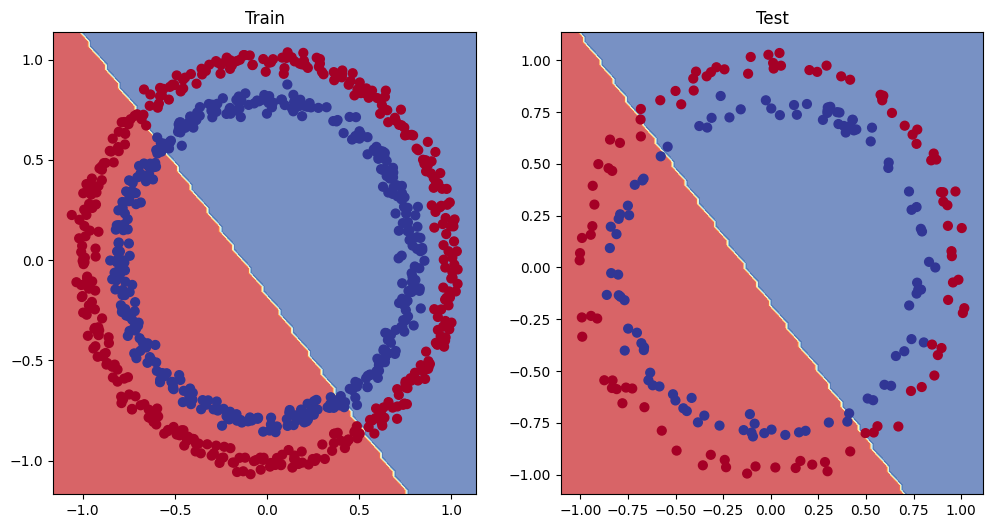

In [49]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  # 1행 2열의 서브플롯 중 첫 번째 위치에 그릴 준비
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)  # model_0이 훈련 데이터(X_train, y_train)에 대해 만든 결정 경계를 시각화
plt.subplot(1,2,2)  # 1행 2열의 서브플롯 중 두 번째 위치에 그릴 준비
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)  # model_0이 테스트 데이터(X_test, y_test)에 대해 만든 결정 경계를 시각화

# this model is underfitting: 데이터로부터 예측에 필요한 패턴을 제대로 학습하고 있지 못함

# Improving a model (from a model perspective)

1. Add more layers  
  - 레이어는 데이터를 통해 새로운 패턴을 학습할 수 있게 해주므로, 학습 능력이 증가할 수도 있음. layers 수를 늘리는 것을 making your neural network deeper
2. Add more hidden units  
  - hidden units per layer가 많아지면 학습 능력이 좋아질 수 있음. gidden units의 수를 늘리는 것을 making your neural network wider라고 표현함
3. Fitting for longer (more epochs)  
  - 학습할 기회(에폭)을 늘리면 모델이 더 많은 것을 배울 수도 있음
4. Changing the activation functions
  - 직선만으로는 복잡한 데이터를 잘 나눌 수 없음, using non-linear activation functions can help with this 
5. Change the learning rate
  - 옵티마이저의 learning rate는 모델이 매 스텝마다 파라미터를 얼마나 조정할지를 결정함, too much and the model overcorrects, too little and it doesn't learn enough
6. Change the loss function
  - different problems require different loss functions
7. Use transfer learning 
  - 비슷한 문제에 대해 pretrained model을 가져와서 내 문제에 맞게 조정하는 방법

이 모든 값을 사용자가 직접 조정할 수 있기 때문에 hyperparameters라고 부름


In [50]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
print(model_1)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


In [52]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

torch.manual_seed(42)
epochs =1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch%100 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


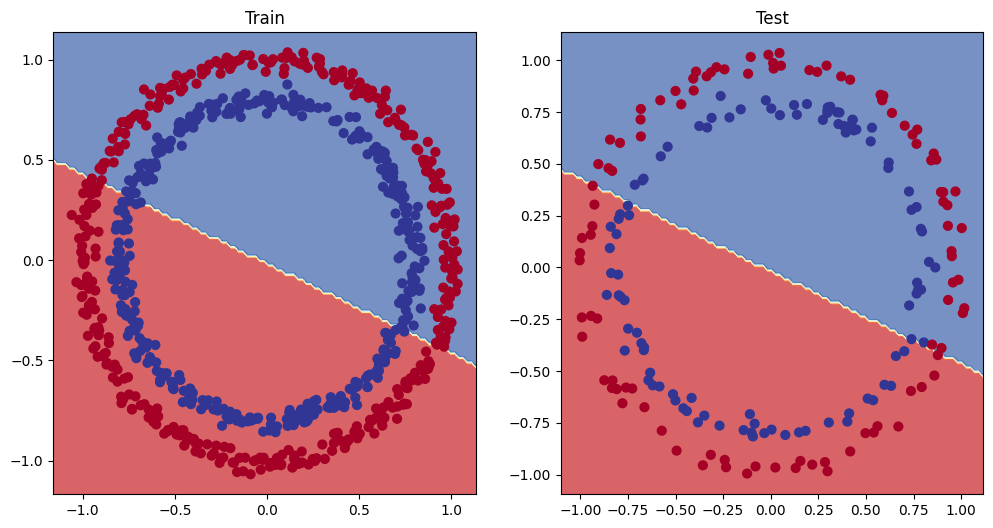

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [55]:
# Preparing data to see if our model can model a straight line (모델이 직선 관계를 잘 학습할 수 있는지 알아보기 위한 데이터 준비)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias

print(len(X_regression))
print(X_regression[:5])
print(y_regression[:5])

100
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]])
tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])


In [56]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))

80 80 20 20


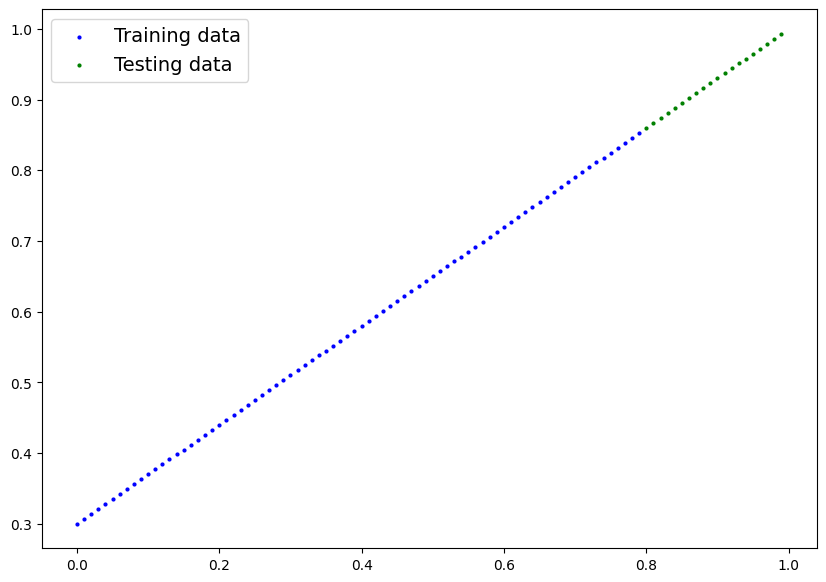

In [59]:
plot_predictions(train_data=X_train_regression, 
train_labels=y_train_regression,
test_data = X_test_regression,
test_labels=y_test_regression)

In [60]:
# adjusting model_1 to fit a straight line
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

print(model_2)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [61]:
# nn.L1Loss() (same as mean absolute error)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [62]:
torch.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    if epoch%100 ==0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


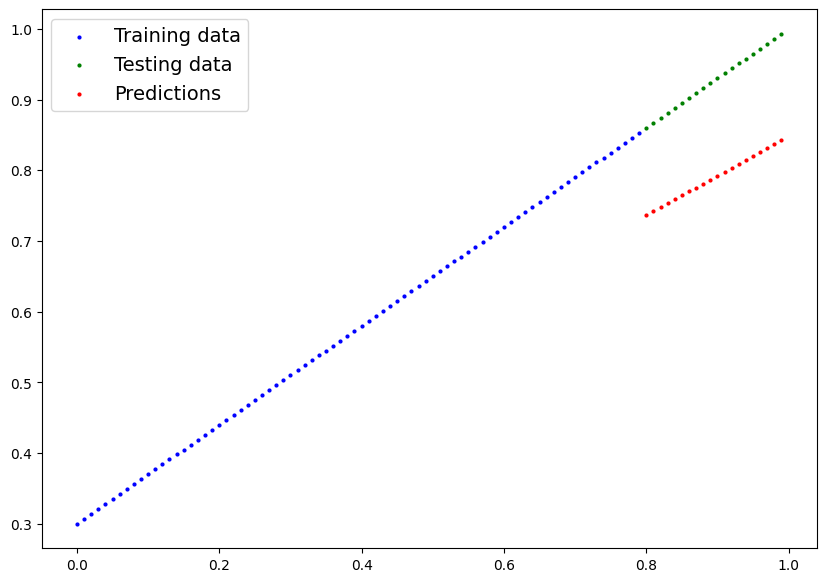

In [64]:
# plotting function uses matplotlib and matplotlib can't handle data on the GPU
# To handle that, send all of our data to the CPU using .cpu() when we pass it to plot_predictions()

model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
train_labels = y_train_regression.cpu(),
test_data = X_test_regression.cpu(),
test_labels = y_test_regression.cpu(),
predictions = y_preds.cpu())

In [65]:
# Troubleshooting : 문제 해결, 디버깅
# 딥러닝 모델을 구축할 때 유용한 디버깅(문제 해결) 방법은 스케일을 키우기 전에(before scaling it up) 가능한 한 단순한(small) 상태로부터 시작해서 모델이 작동하는지 확인하는 것임
# a simple neural network (not many layers, not many hidden neurons) and a small dataset으로 시작하는 것을 의미할 수 있으며, 
# 그 작은 예제에 대해 overfitting(과적합, making the model perform too well) 시킨 후, 과적합을 줄이기 위해 데이터의 양이나 모델의 size/design을 증가시키는 것을 의미할 수 있음


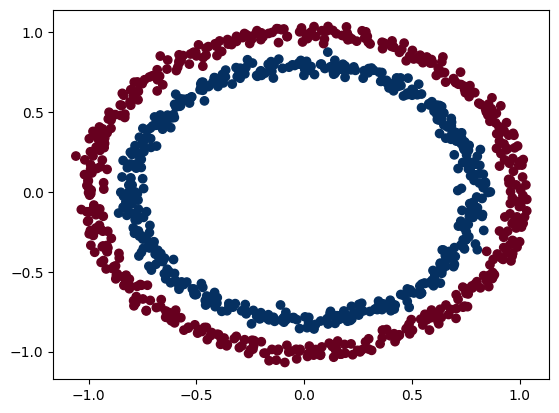

In [69]:
# non-linearity

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000, noise = 0.03, random_state=42,)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdBu)

In [70]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train[:5])
print(y_train[:5])

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])
tensor([1., 0., 0., 0., 1.])


In [73]:
# building a model with non-linearity

# Relu (rectified linear-unit), torch.nn.ReLU()
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        # can also put sigmoid in the model
        # sigmoid 함수를 모델 안에 직접 넣었을 경우, 모델을 사용해 예측할 때 따로 sigmoid를 적용할 필요가 없음
    
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
